In [3]:
import numpy as np
import pandas as pd
from statsmodels.stats.power import TTestIndPower

In [4]:
# calculate effect size for 24hr BW
data = {
    "Group": ["veh", "veh", "veh", "veh", "veh", "veh", "veh", "veh", "veh", "veh", "veh",
              "cgrp", "cgrp", "cgrp", "cgrp", "cgrp", "cgrp", "cgrp", "cgrp", "cgrp", "cgrp", "cgrp"],
    "Value": [0.7, -2, -0.2, -5.6, -2.7, 0.2, 1.7, 10.9, 4.9, -2.2, 4.9,
              -3.2, -17.5, 6.5, -6.9, -26.4, 0.1, -6.3, 1.3, -1.1, -5.7, -11.3]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Split data into two groups
veh_values = df[df["Group"] == "veh"]["Value"]
cgrp_values = df[df["Group"] == "cgrp"]["Value"]

# Calculate the means and pooled standard deviation
mean_veh = veh_values.mean()
mean_cgrp = cgrp_values.mean()
std_veh = veh_values.std()
std_cgrp = cgrp_values.std()

# Calculate pooled standard deviation
pooled_std = ((std_veh**2 + std_cgrp**2) / 2) ** 0.5

# Calculate Cohen's d
cohens_d = (mean_veh - mean_cgrp) / pooled_std

mean_veh, mean_cgrp, pooled_std, cohens_d


(0.9636363636363636,
 -6.409090909090909,
 7.2863383995479705,
 1.0118562806779139)

Required sample size per group: 17.0


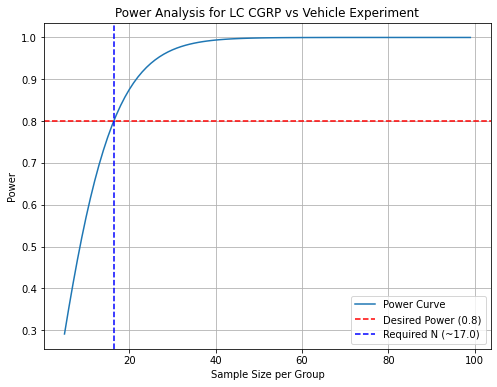

In [12]:
# power anaylsis for 24hr BW 

# Parameters for the power analysis
effect_size = 1.01  # Cohen's d, can adjust based on expected effect size
alpha = 0.05  # Significance level
power = 0.8  # Desired power (1 - beta)
ratio = 1.0  # Ratio of sample sizes between the two groups (e.g., 1:1)

# Initialize the power analysis object
analysis = TTestIndPower()

# Calculate the required sample size
sample_size = analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=ratio)

# Print the result
print(f"Required sample size per group: {np.ceil(sample_size)}")

# Optional: Plot the relationship between sample size and power
import matplotlib.pyplot as plt

sample_sizes = np.arange(5, 100, 1)  # Range of sample sizes to evaluate
powers = analysis.power(effect_size=effect_size, nobs1=sample_sizes, alpha=alpha, ratio=ratio)

plt.figure(figsize=(8, 6))
plt.plot(sample_sizes, powers, label="Power Curve")
plt.axhline(y=power, color='red', linestyle='--', label="Desired Power (0.8)")
plt.axvline(x=sample_size, color='blue', linestyle='--', label=f"Required N (~{np.ceil(sample_size)})")
plt.xlabel('Sample Size per Group')
plt.ylabel('Power')
plt.title('Power Analysis for LC CGRP vs Vehicle Experiment')
plt.legend()
plt.grid()
plt.show()


In [13]:
#calculate effect size for cumulative food intake at 6hrs 

data_food_intake = {
    "Cumulative food intake": [
        10.6, 10.17, 12.88, 10.46, 9.08, 12.3, 12.41, 17.42, 17.39, 14.72, 9.54,
        8.88, 8.14, 10.45, 7.62, 0.1, 10.4, 3.57, 12.64, 11.9, 10.25, 5.65
    ],
    "Treatment": [
        "veh", "veh", "veh", "veh", "veh", "veh", "veh", "veh", "veh", "veh", "veh",
        "cgrp", "cgrp", "cgrp", "cgrp", "cgrp", "cgrp", "cgrp", "cgrp", "cgrp", "cgrp", "cgrp"
    ]
}

# Create a DataFrame
df_food_intake = pd.DataFrame(data_food_intake)

# Split data into two groups
veh_food = df_food_intake[df_food_intake["Treatment"] == "veh"]["Cumulative food intake"]
cgrp_food = df_food_intake[df_food_intake["Treatment"] == "cgrp"]["Cumulative food intake"]

# Calculate the means and pooled standard deviation
mean_veh_food = veh_food.mean()
mean_cgrp_food = cgrp_food.mean()
std_veh_food = veh_food.std()
std_cgrp_food = cgrp_food.std()

# Calculate pooled standard deviation
pooled_std_food = ((std_veh_food**2 + std_cgrp_food**2) / 2) ** 0.5

# Calculate Cohen's d for food intake
cohens_d_food = (mean_veh_food - mean_cgrp_food) / pooled_std_food

mean_veh_food, mean_cgrp_food, pooled_std_food, cohens_d_food


(12.451818181818181, 8.145454545454546, 3.38156795261929, 1.2734813248475512)

Required sample size per group: 11.0


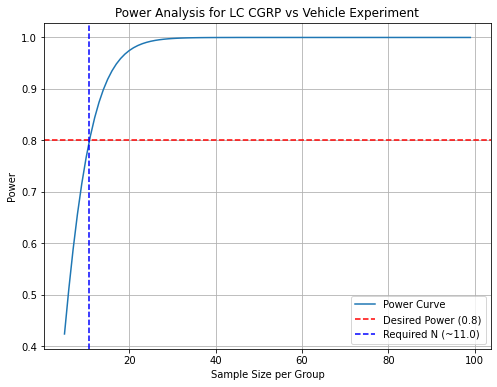

In [14]:
# power anaylsis for food intake 

# Parameters for the power analysis
effect_size = 1.27  # Cohen's d, can adjust based on expected effect size
alpha = 0.05  # Significance level
power = 0.8  # Desired power (1 - beta)
ratio = 1.0  # Ratio of sample sizes between the two groups (e.g., 1:1)

# Initialize the power analysis object
analysis = TTestIndPower()

# Calculate the required sample size
sample_size = analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=ratio)

# Print the result
print(f"Required sample size per group: {np.ceil(sample_size)}")

# Optional: Plot the relationship between sample size and power
import matplotlib.pyplot as plt

sample_sizes = np.arange(5, 100, 1)  # Range of sample sizes to evaluate
powers = analysis.power(effect_size=effect_size, nobs1=sample_sizes, alpha=alpha, ratio=ratio)

plt.figure(figsize=(8, 6))
plt.plot(sample_sizes, powers, label="Power Curve")
plt.axhline(y=power, color='red', linestyle='--', label="Desired Power (0.8)")
plt.axvline(x=sample_size, color='blue', linestyle='--', label=f"Required N (~{np.ceil(sample_size)})")
plt.xlabel('Sample Size per Group')
plt.ylabel('Power')
plt.title('Power Analysis for LC CGRP vs Vehicle Experiment')
plt.legend()
plt.grid()
plt.show()